In [1]:
import matplotlib.pyplot as plt

import sys
import numpy as np
import pandas as pd

sys.path.append("/home/chenga/software/matplotlib-chord-diagram")
from mplchord import chordDiagram, hex2rgb

from mpl_chord_diagram import chord_diagram

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
short_cat = {"3prime_overlapping_ncRNA": "lncRNA",
             "3prime_overlapping_ncrna": "lncRNA",
             "antisense": "lncRNA",
             "bidirectional_promoter_lncRNA": "lncRNA",
             "IG_C_gene": "Others",
             "IG_C_pseudogene": "Others",
             "IG_D_gene": "Others",
             "IG_D_pseudogene": "Others",
             "IG_J_gene": "Others",
             "IG_J_pseudogene": "Others",
             "IG_LV_gene": "Others",
             "IG_pseudogene": "Others",
             "IG_V_gene": "Others",
             "IG_V_pseudogene": "Others",
             "lincRNA": "lncRNA",
             "macro_lncRNA": "lncRNA",
             "miRNA": "ncRNA",  # nc
             "misc_RNA": "ncRNA",  # nc
             "Mt_rRNA": "rRNA",
             "Mt_tRNA": "rRNA",
             "polymorphic_pseudogene": "Others",
             "processed_pseudogene": "Others",
             "processed_transcript": "Others",
             "protein_coding": "mRNA",
             "pseudogene": "Others",
             "ribosomal_RNA": "rRNA",
             "ribozyme": "Others",
             "rRNA": "rRNA",
             "sense_intronic": "lncRNA",
             "sense_overlapping": "lncRNA",
             "scaRNA": "ncRNA",
             "snoRNA": "snoRNA",
             "snRNA": "snRNA",
             "scRNA": "ncRNA",
             "sRNA": "ncRNA",
             "TEC": "Others",
             "transcribed_processed_pseudogene": "Others",
             "transcribed_unitary_pseudogene": "Others",
             "transcribed_unprocessed_pseudogene": "Others",
             "TR_C_gene": "Others",
             "TR_D_gene": "Others",
             "TR_J_gene": "Others",
             "TR_J_pseudogene": "Others",
             "TR_V_gene": "Others",
             "TR_V_pseudogene": "Others",
             "unitary_pseudogene": "Others",
             "unprocessed_pseudogene": "Others"}

In [3]:
def parse_results(data, nodes, f_results):
    
    with open(f_results, "r") as f:
        for line in f:
            row = line.strip("\r\n").split("\t")
            t1, t2, count = row[0], row[1], int(row[2])
            
            if short_cat[t1] == "mRNA" and short_cat[t2] == "rRNA":
                continue
            elif short_cat[t1] == "rRNA" and short_cat[t2] == "mRNA":
                continue

            i = nodes.index(short_cat[t1])
            j = nodes.index(short_cat[t2])
            
            if i == j:
                data[i,j] += count
            else:
                data[i,j] += count
                data[j,i] += count
    
    return data

In [4]:
def plot_overall_circos(f_inter, f_output=None):

    nodes = ["rRNA", "mRNA", "lncRNA", "snoRNA", "snRNA", "ncRNA", "Others"]
    labels = nodes

    data = np.array(np.zeros((len(nodes), len(nodes))))

    data = parse_results(data, nodes, f_inter)

    # Plot Circos
    fig = plt.figure(figsize=(6,6))
    ax = plt.axes([0,0,1,1])

    colors = ["#c23f76", "#156697", "#f2cc21", "#9994c2", "#34a198",
              "#5b5b6d", "#9e1f63", "#a0522d", "#f99533", "#269c62"]
    colors = [ hex2rgb(x) for x in colors ]
    #nodePos = chordDiagram(data, ax, colors=colors, chordwidth=p_chordwidth, width=p_width)
    nodePos = chord_diagram(data, ax=ax, colors=colors[:len(nodes)], names=nodes, rotate_names=[True for _ in range(len(nodes))])
    ax.axis('off')

    prop = dict(fontsize=16*0.8, ha='center', va='center')

    #for i in range(len(nodes)):
    #    ax.text(nodePos[i][0], nodePos[i][1], labels[i], rotation=nodePos[i][2], **prop)

    for n, i in zip(nodes, data.sum(axis=1)/data.sum()):
        print("%-30s %.1f%%" % (n, i*100.0))

    if f_output is not None:
        plt.savefig(f_output)

### KARR-seq (K562)

rRNA                           24.3%
mRNA                           41.6%
lncRNA                         14.7%
snoRNA                         4.5%
snRNA                          1.1%
ncRNA                          7.6%
Others                         6.3%


/home/chenga/anaconda3/envs/py37/lib/python3.7/site-packages/mpl_chord_diagram/chord_diagram.py:313: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


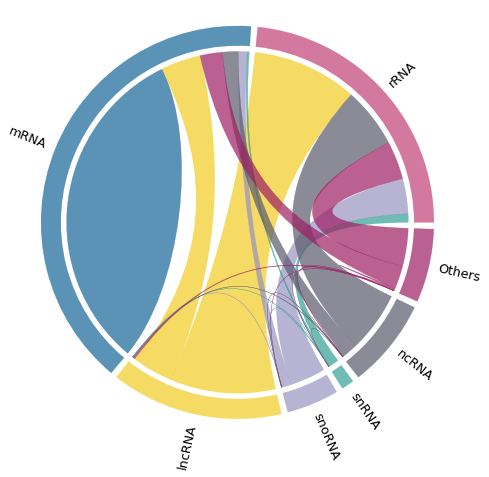

In [5]:
f_inter = "../analysis/annotations/trans/results/genomic-category/hcanonical_v2/G1_kethoxal-K562_M15_B01_inter.txt"
f_output = None
plot_overall_circos(f_inter, f_output=f_output)

### KARR-seq (K562, Nuclear)

rRNA                           17.6%
mRNA                           48.2%
lncRNA                         16.6%
snoRNA                         8.7%
snRNA                          0.9%
ncRNA                          1.0%
Others                         7.0%


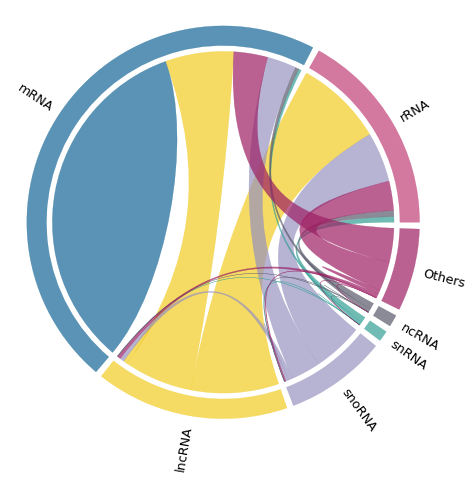

In [6]:
f_inter = "../analysis/annotations/trans/results/genomic-category/hcanonical_v2/G1_kethoxal-K562-Nuclear_M17_B01_inter.txt"
f_output = None
plot_overall_circos(f_inter, f_output=f_output)